In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
data = pd.read_csv("/dev1/genomeGPT/optinum/Opti-Num/lending-club-loan-data-csv/fullloandata.csv").convert_dtypes()
meta_data = pd.read_excel("/dev1/genomeGPT/optinum/Opti-Num/lending-club-loan-data-csv/LCDataDictionary.xlsx")
data.head(5)

/tmp/ipykernel_123475/3295208508.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/dev1/genomeGPT/optinum/Opti-Num/lending-club-loan-data-csv/fullloandata.csv").convert_dtypes()
/dev1/genomeGPT/anaconda3/envs/optinum/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [3]:
data['home_ownership'].unique()

<StringArray>
['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY']
Length: 6, dtype: string

In [4]:
meta_data

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,annual_inc_joint,The combined self-reported annual income provi...
3,application_type,Indicates whether the loan is an individual ap...
4,collection_recovery_fee,post charge off collection fee
...,...,...
75,acc_now_delinq,The number of accounts on which the borrower i...
76,tot_coll_amt,Total collection amounts ever owed
77,tot_cur_bal,Total current balance of all accounts
78,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  Int64  
 1   member_id                    887379 non-null  Int64  
 2   loan_amnt                    887379 non-null  Int64  
 3   funded_amnt                  887379 non-null  Int64  
 4   funded_amnt_inv              887379 non-null  Float64
 5   term                         887379 non-null  Int64  
 6   int_rate                     887379 non-null  Float64
 7   installment                  887379 non-null  Float64
 8   grade                        887379 non-null  string 
 9   sub_grade                    887379 non-null  string 
 10  emp_title                    835917 non-null  string 
 11  emp_length                   842554 non-null  Int64  
 12  home_ownership               887379 non-null  string 
 13 

# Analysis of people with Mortgages

In [6]:
# Filter members only with a mortgage
mortgage_data = data[data['home_ownership'] == 'MORTGAGE']
# Convert 'issue_d' to datetime format
mortgage_data['issue_d'] = pd.to_datetime(mortgage_data['issue_d'])

/tmp/ipykernel_123475/3213727231.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mortgage_data['issue_d'] = pd.to_datetime(mortgage_data['issue_d'])
/tmp/ipykernel_123475/3213727231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortgage_data['issue_d'] = pd.to_datetime(mortgage_data['issue_d'])


In [7]:
data.size

65666046

In [8]:
data.size / mortgage_data.size

2.0005974429441986

In [9]:
data['home_ownership'].unique()

<StringArray>
['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY']
Length: 6, dtype: string

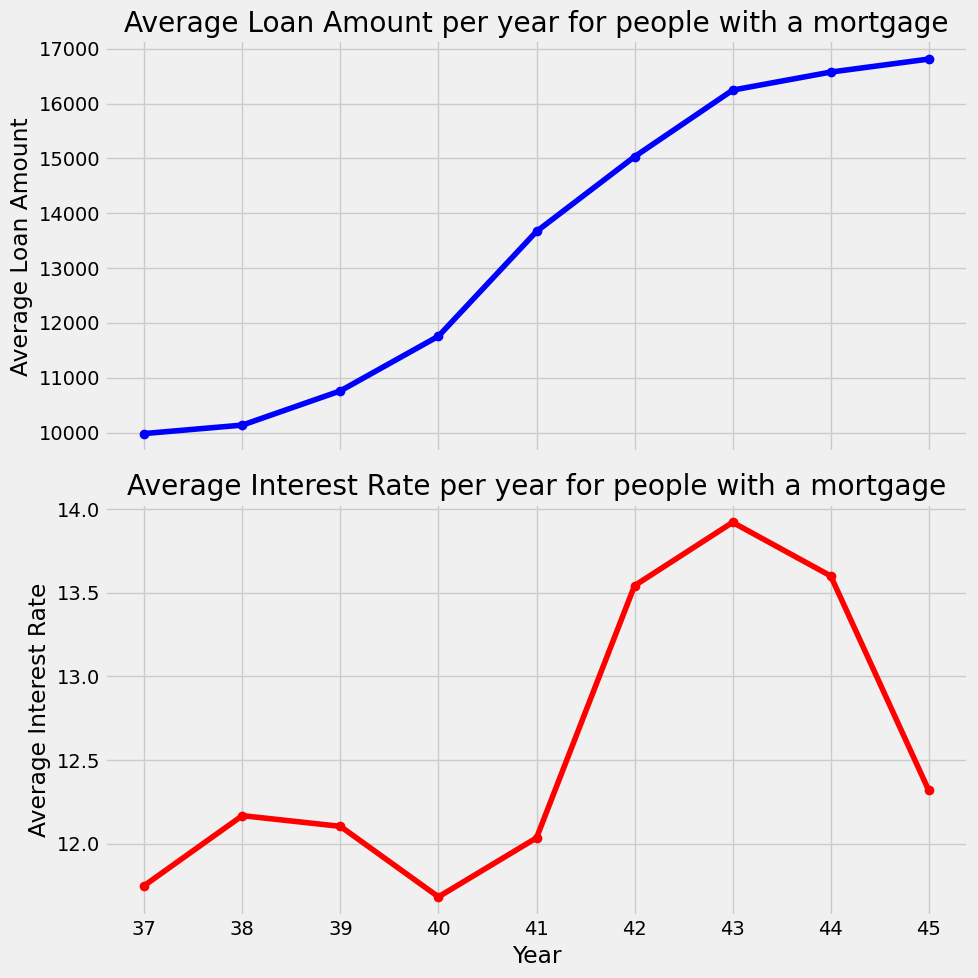

/tmp/ipykernel_123475/3250589892.py:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  own_data['issue_d'] = pd.to_datetime(own_data['issue_d'])
/tmp/ipykernel_123475/3250589892.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  own_data['issue_d'] = pd.to_datetime(own_data['issue_d'])
/tmp/ipykernel_123475/3250589892.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


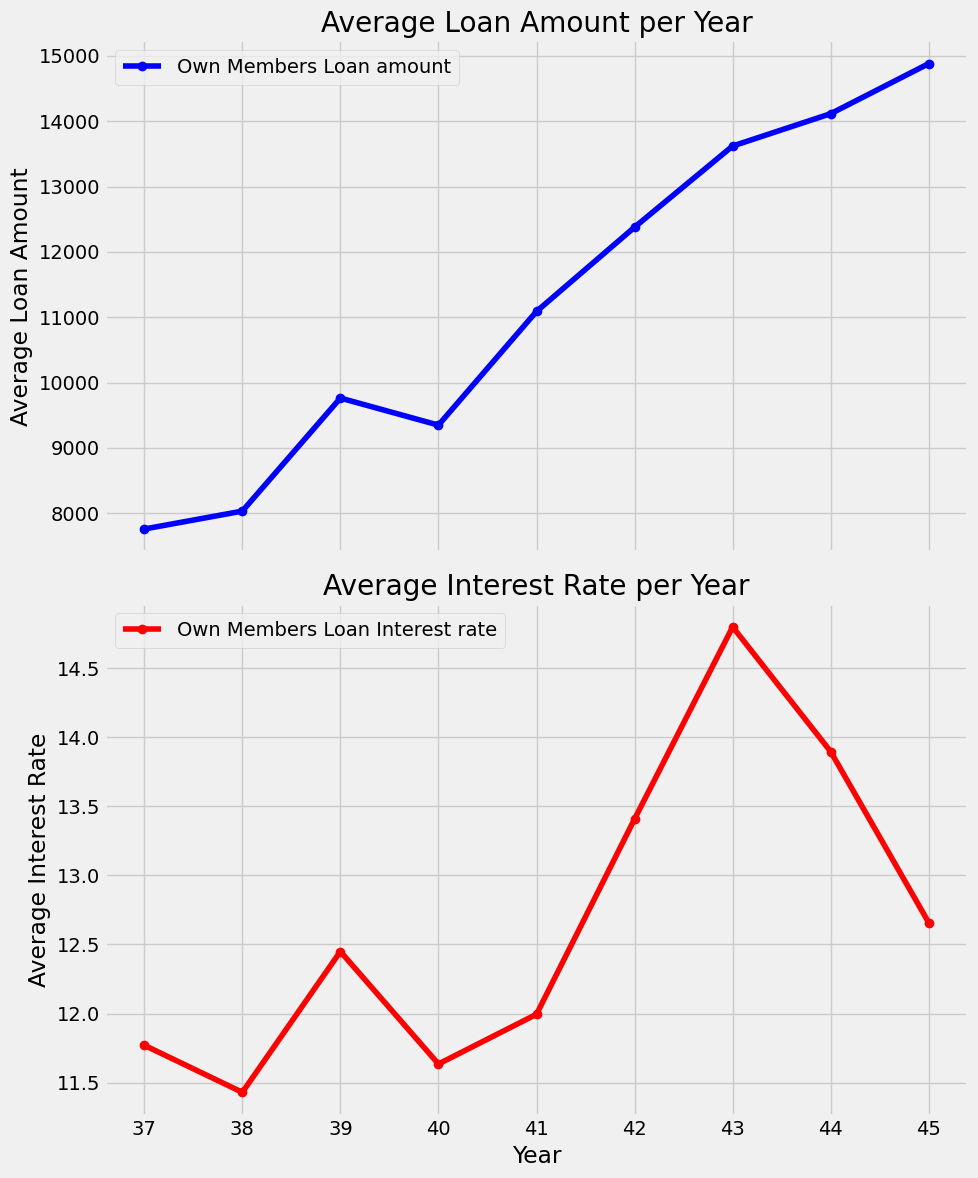

/tmp/ipykernel_123475/3250589892.py:96: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rent_data['issue_d'] = pd.to_datetime(rent_data['issue_d'])
/tmp/ipykernel_123475/3250589892.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_data['issue_d'] = pd.to_datetime(rent_data['issue_d'])
/tmp/ipykernel_123475/3250589892.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

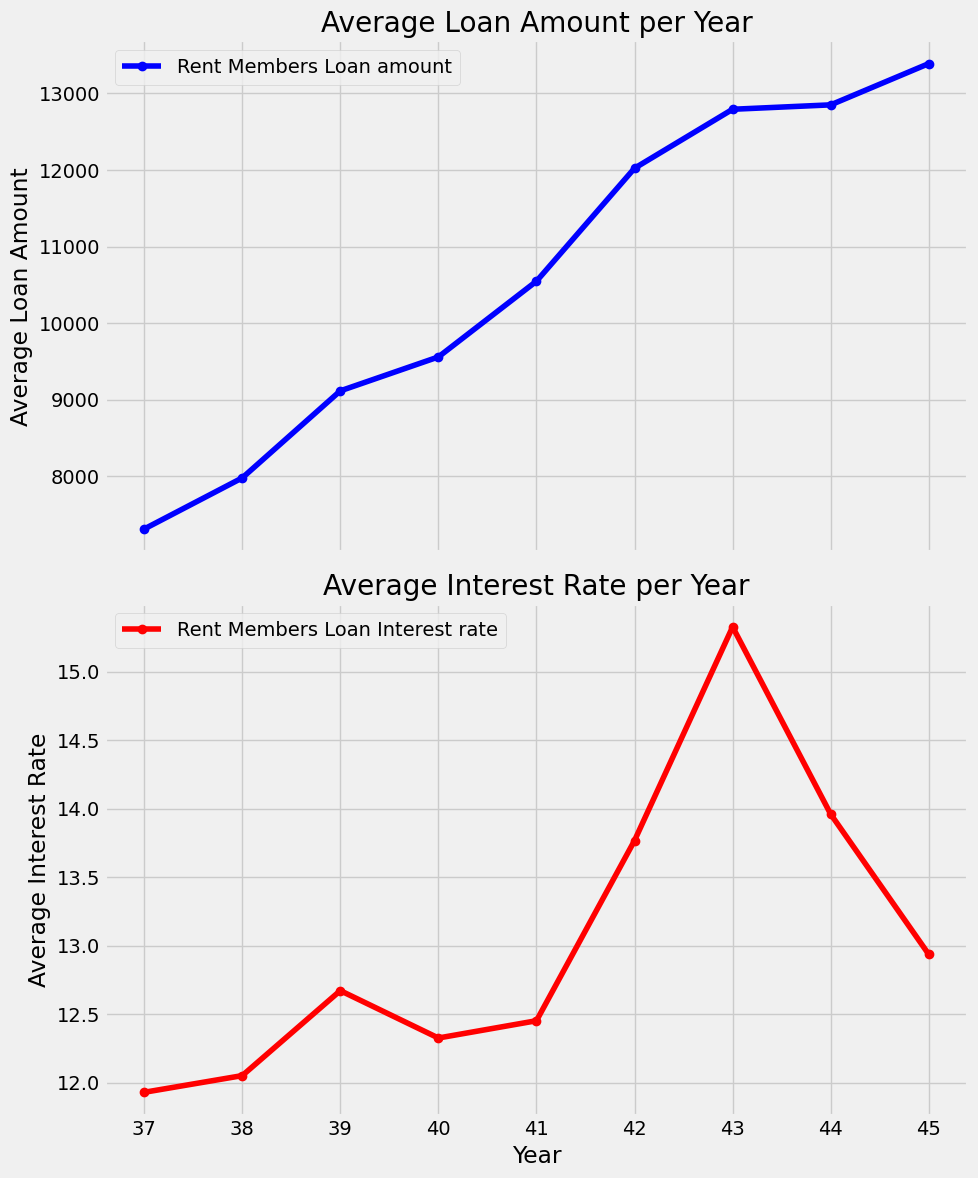

/tmp/ipykernel_123475/3250589892.py:148: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  other_data['issue_d'] = pd.to_datetime(other_data['issue_d'])
/tmp/ipykernel_123475/3250589892.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_data['issue_d'] = pd.to_datetime(other_data['issue_d'])
/tmp/ipykernel_123475/3250589892.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

Series([], Name: loan_amnt, dtype: Float64)


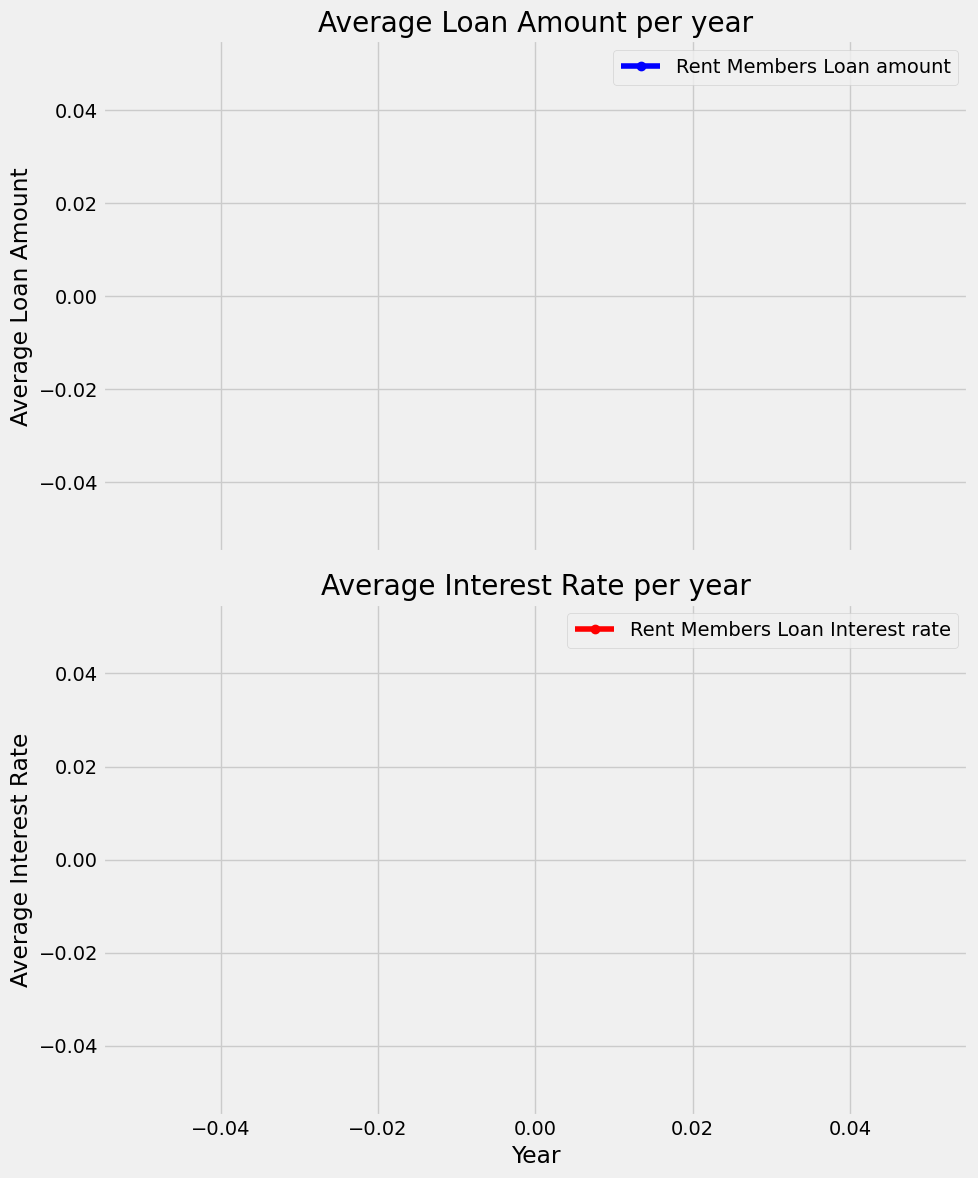

In [13]:
# Convert 'loan_amnt' to numeric type
mortgage_data['loan_amnt'] = pd.to_numeric(mortgage_data['loan_amnt'], errors='coerce')
# Remove percentage sign and convert 'int_rate' to numeric type
mortgage_data['int_rate'] = pd.to_numeric(mortgage_data['int_rate'].astype(str).str.rstrip('%'), errors='coerce')
# Remove rows with NaN values in 'loan_amnt' and 'int_rate'
mortgage_data = mortgage_data.dropna(subset=['loan_amnt', 'int_rate'])

# Group by month and calculate the average loan amount
monthly_avg_loan_amount = mortgage_data.groupby(mortgage_data['issue_d'].dt.to_period("Y"))['loan_amnt'].mean()
# Group by month and calculate the average interest rate
monthly_avg_interest_rate = mortgage_data.groupby(mortgage_data['issue_d'].dt.to_period("Y"))['int_rate'].mean()

# Plotting

# Convert Period index to numeric representation for plotting
monthly_avg_loan_amount.index = monthly_avg_loan_amount.index.astype(int)
monthly_avg_interest_rate.index = monthly_avg_interest_rate.index.astype(int)
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot average loan amount
ax1.plot(monthly_avg_loan_amount, marker='o', color='b')
ax1.set_title('Average Loan Amount per year for people with a mortgage')
ax1.set_ylabel('Average Loan Amount')
ax1.grid(True)

# Plot average interest rate
ax2.plot(monthly_avg_interest_rate, marker='o', color='r')
ax2.set_title('Average Interest Rate per year for people with a mortgage')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Interest Rate')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Save figures as .png files for mortgage data
fig.savefig('average_loan_amount_interest_rate_mortgage.png')
plt.close(fig)  # Close the current figure to free up memory


# Filter members who owns
own_data = data[data['home_ownership'] == 'OWN']
# Convert 'issue_d' to datetime format
own_data['issue_d'] = pd.to_datetime(own_data['issue_d'])

# Loan amount

# Convert 'loan_amnt' to numeric type
own_data['loan_amnt'] = pd.to_numeric(own_data['loan_amnt'], errors='coerce')
# Remove percentage sign and convert 'int_rate' to numeric type
own_data['int_rate'] = pd.to_numeric(own_data['int_rate'].astype(str).str.rstrip('%'), errors='coerce')
# Remove rows with NaN values in 'loan_amnt' and 'int_rate'
own_data = own_data.dropna(subset=['loan_amnt', 'int_rate'])

# Group by month and calculate the average loan amount
own_monthly_avg_loan_amount = own_data.groupby(own_data['issue_d'].dt.to_period("Y"))['loan_amnt'].mean()
# Group by month and calculate the average interest rate
own_monthly_avg_interest_rate = own_data.groupby(own_data['issue_d'].dt.to_period("Y"))['int_rate'].mean()

# Convert Period index to numeric representation for plotting
own_monthly_avg_loan_amount.index = own_monthly_avg_loan_amount.index.astype(int)
own_monthly_avg_interest_rate.index = own_monthly_avg_interest_rate.index.astype(int)

# Plotting
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot average loan amount for members who own
ax1.plot(own_monthly_avg_loan_amount.index.astype(str), own_monthly_avg_loan_amount.values, marker='o', color='b', label='Own Members Loan amount')
ax1.set_title('Average Loan Amount per Year')
ax1.set_ylabel('Average Loan Amount')
ax1.grid(True)
ax1.legend()

# Plot average interest rate for all members
ax2.plot(own_monthly_avg_interest_rate.index.astype(str), own_monthly_avg_interest_rate.values, marker='o', color='r', label='Own Members Loan Interest rate')
ax2.set_title('Average Interest Rate per Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Interest Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Save figures as .png files for own members data
fig.savefig('average_loan_amount_interest_rate_own.png')
plt.close(fig)



# Filter members who rent
rent_data = data[data['home_ownership'] == 'RENT']
# Convert 'issue_d' to datetime format
rent_data['issue_d'] = pd.to_datetime(rent_data['issue_d'])

# Loan amount

# Convert 'loan_amnt' to numeric type
rent_data['loan_amnt'] = pd.to_numeric(rent_data['loan_amnt'], errors='coerce')
# Remove percentage sign and convert 'int_rate' to numeric type
rent_data['int_rate'] = pd.to_numeric(rent_data['int_rate'].astype(str).str.rstrip('%'), errors='coerce')
# Remove rows with NaN values in 'loan_amnt' and 'int_rate'
rent_data = rent_data.dropna(subset=['loan_amnt', 'int_rate'])

# Loan amount

# Group by month and calculate the average loan amount
rent_monthly_avg_loan_amount = rent_data.groupby(rent_data['issue_d'].dt.to_period("Y"))['loan_amnt'].mean()
# Group by month and calculate the average interest rate
rent_monthly_avg_interest_rate = rent_data.groupby(rent_data['issue_d'].dt.to_period("Y"))['int_rate'].mean()

# Convert Period index to numeric representation for plotting
rent_monthly_avg_loan_amount.index = rent_monthly_avg_loan_amount.index.astype(int)
rent_monthly_avg_interest_rate.index = rent_monthly_avg_interest_rate.index.astype(int)

# Plotting
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot average loan amount for members who own
ax1.plot(rent_monthly_avg_loan_amount.index.astype(str), rent_monthly_avg_loan_amount.values, marker='o', color='b', label='Rent Members Loan amount')
ax1.set_title('Average Loan Amount per Year')
ax1.set_ylabel('Average Loan Amount')
ax1.grid(True)
ax1.legend()

# Plot average interest rate for all members
ax2.plot(rent_monthly_avg_interest_rate.index.astype(str), rent_monthly_avg_interest_rate.values, marker='o', color='r', label='Rent Members Loan Interest rate')
ax2.set_title('Average Interest Rate per Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Interest Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


# Save figures as .png files for rent members data
fig.savefig('average_loan_amount_interest_rate_rent.png')
plt.close(fig)


other_data = data[(data['home_ownership'] == 'OTHER') | (data['home_ownership'] == 'NONE') | (data['home_ownership'] == 'ANY')]
# Convert 'issue_d' to datetime format
other_data['issue_d'] = pd.to_datetime(other_data['issue_d'])

# Loan amount

# Convert 'loan_amnt' to numeric type
other_data['loan_amnt'] = pd.to_numeric(other_data['loan_amnt'], errors='coerce')
# Remove percentage sign and convert 'int_rate' to numeric type
other_data['int_rate'] = pd.to_numeric(other_data['int_rate'].astype(str).str.rstrip('%'), errors='coerce')
# Remove rows with NaN values in 'loan_amnt' and 'int_rate'
other_data = other_data.dropna(subset=['loan_amnt', 'int_rate'])

# Loan amount

# Group by month and calculate the average loan amount
other_monthly_avg_loan_amount = rent_data.groupby(other_data['issue_d'].dt.to_period("Y"))['loan_amnt'].mean()
# Group by month and calculate the average interest rate
other_monthly_avg_interest_rate = rent_data.groupby(other_data['issue_d'].dt.to_period("Y"))['int_rate'].mean()

# Convert Period index to numeric representation for plotting
other_monthly_avg_loan_amount.index = other_monthly_avg_loan_amount.index.astype(int)
other_monthly_avg_interest_rate.index = other_monthly_avg_interest_rate.index.astype(int)
print(other_monthly_avg_loan_amount)
# Plotting
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot average loan amount for members who own
ax1.plot(other_monthly_avg_loan_amount.index.astype(str), other_monthly_avg_loan_amount.values, marker='o', color='b', label='Rent Members Loan amount')
ax1.set_title('Average Loan Amount per year')
ax1.set_ylabel('Average Loan Amount')
ax1.grid(True)
ax1.legend()

# Plot average interest rate for all members
ax2.plot(other_monthly_avg_interest_rate.index.astype(str), other_monthly_avg_interest_rate.values, marker='o', color='r', label='Rent Members Loan Interest rate')
ax2.set_title('Average Interest Rate per year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Interest Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Save figures as .png files for other members data
fig.savefig('average_loan_amount_interest_rate_other.png')
plt.close(fig)

# Trend analysis 

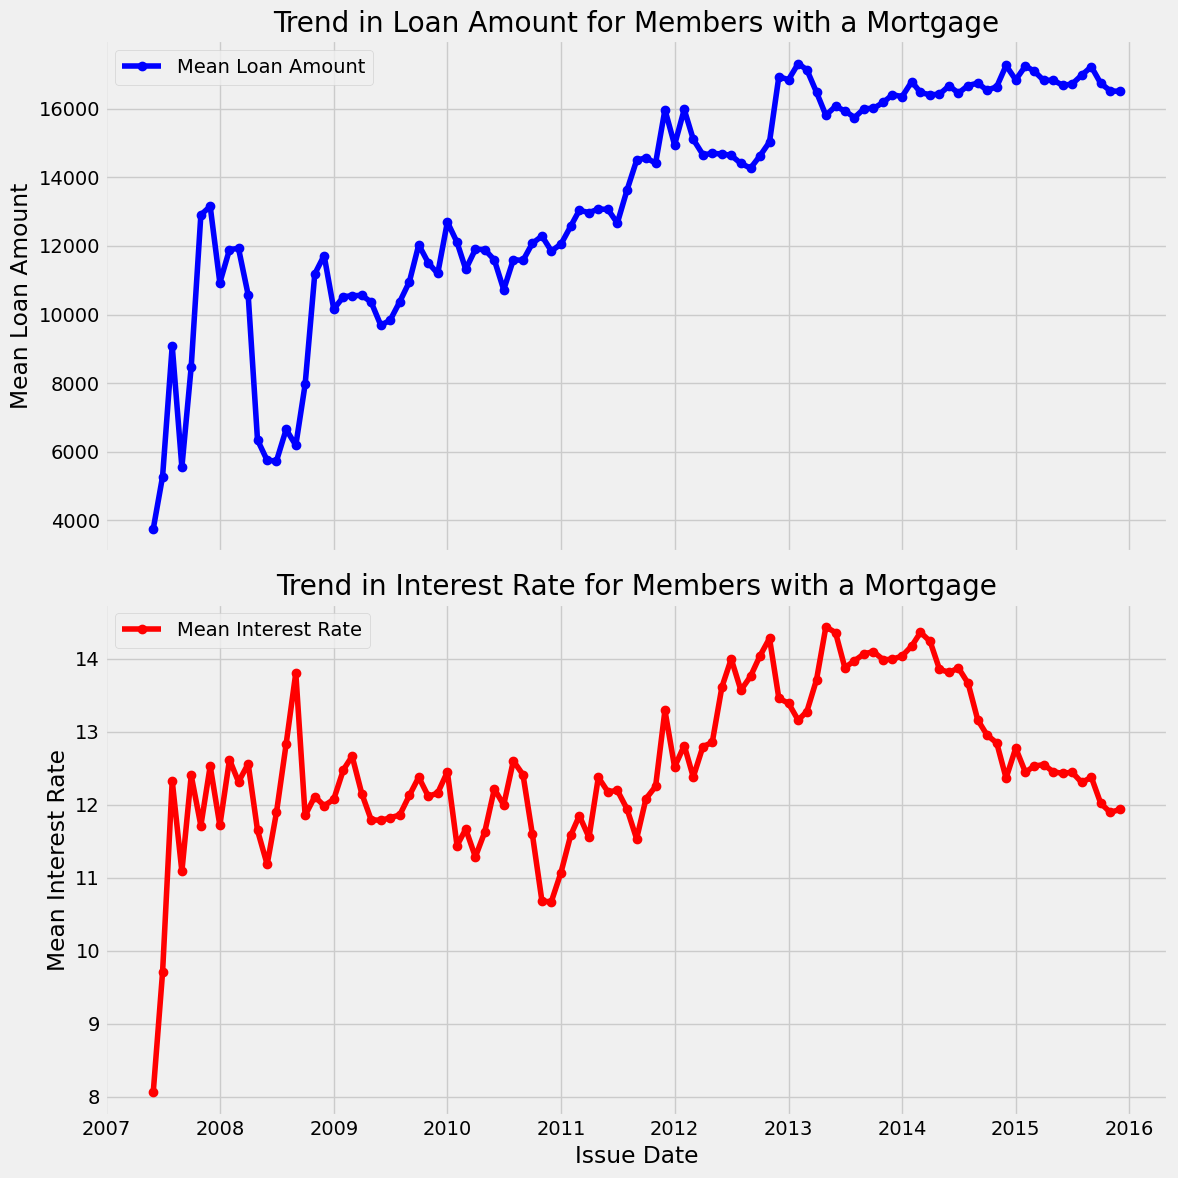

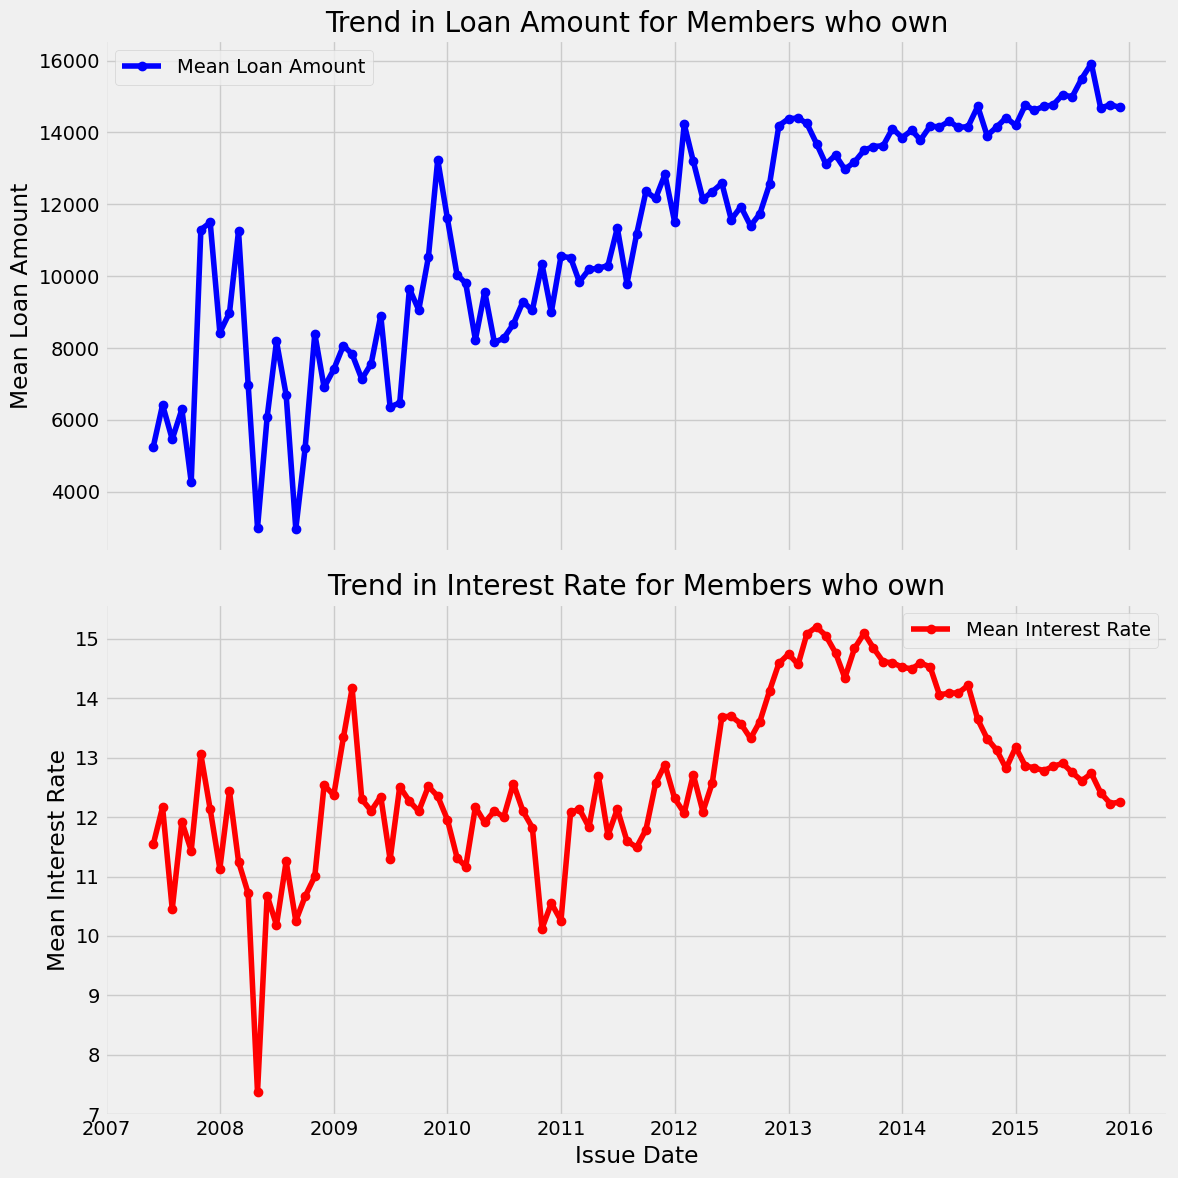

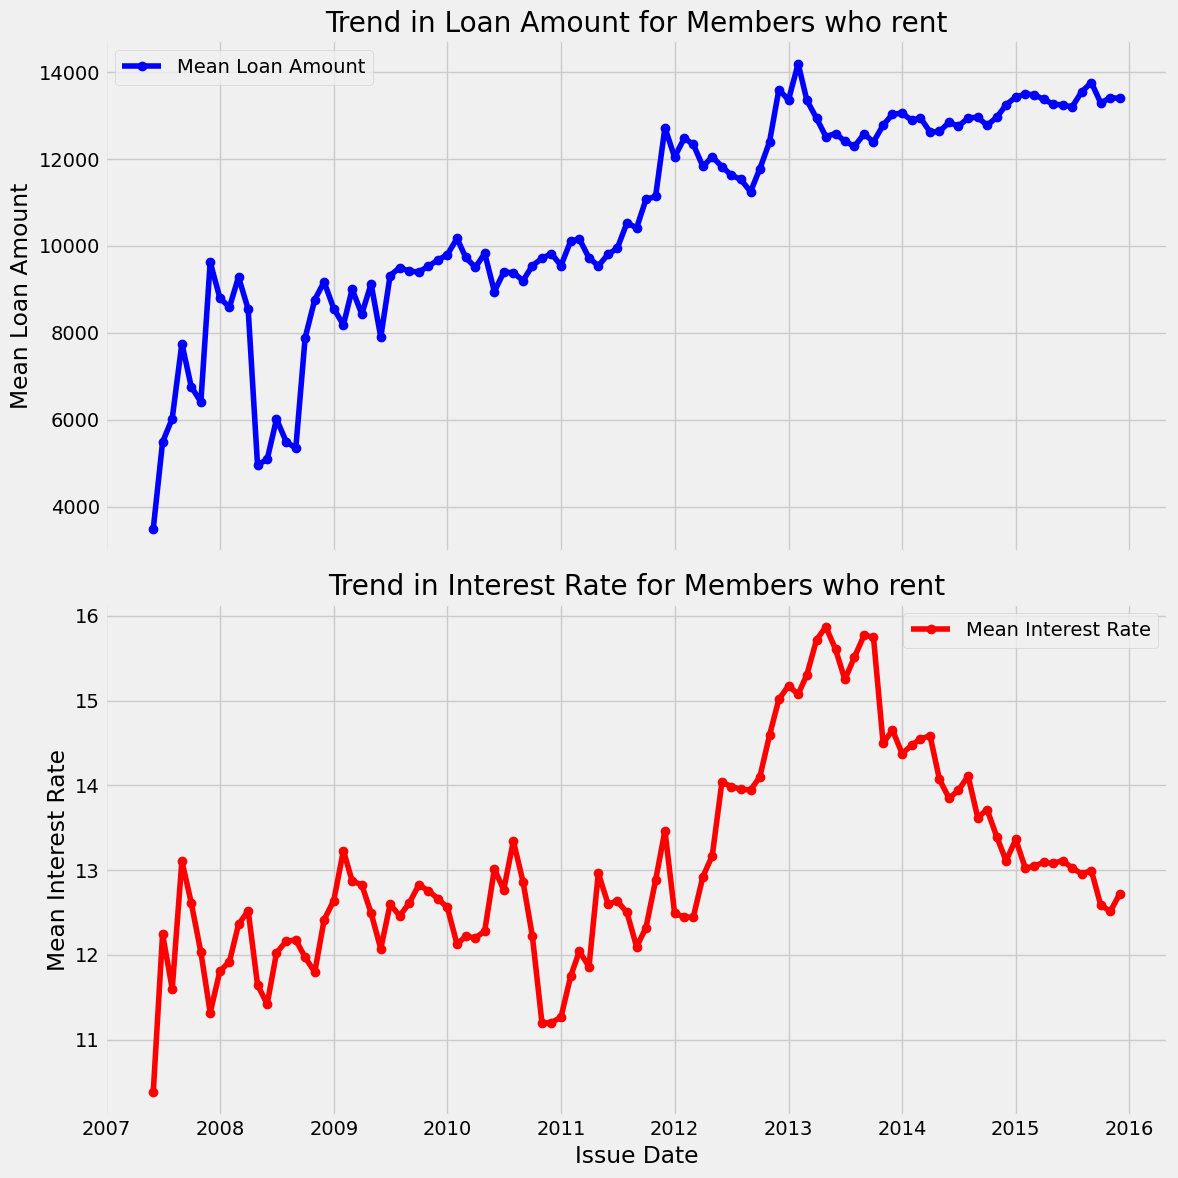

In [14]:
# Group by 'issue_d' and calculate the mean loan amount and interest rate
grouped_data = mortgage_data.groupby('issue_d').agg({'loan_amnt': 'mean', 'int_rate': 'mean'}).reset_index()

# Plotting


# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot mean loan amount
ax1.plot(grouped_data['issue_d'], grouped_data['loan_amnt'], label='Mean Loan Amount', marker='o', color='b')
ax1.set_title('Trend in Loan Amount for Members with a Mortgage')
ax1.set_ylabel('Mean Loan Amount')
ax1.grid(True)
ax1.legend()

# Plot mean interest rate
ax2.plot(grouped_data['issue_d'], grouped_data['int_rate'], label='Mean Interest Rate', marker='o', color='r')
ax2.set_title('Trend in Interest Rate for Members with a Mortgage')
ax2.set_xlabel('Issue Date')
ax2.set_ylabel('Mean Interest Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Save figures as .png files for mortgage data
fig.savefig('trend_loan_amount_interest_rate_mortgage.png')
plt.close(fig)  # Close the current figure to free up memory

# Group by 'issue_d' and calculate the mean loan amount and interest rate
own_grouped_data = own_data.groupby('issue_d').agg({'loan_amnt': 'mean', 'int_rate': 'mean'}).reset_index()

# Plotting


# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot mean loan amount
ax1.plot(own_grouped_data['issue_d'], own_grouped_data['loan_amnt'], label='Mean Loan Amount', marker='o', color='b')
ax1.set_title('Trend in Loan Amount for Members who own')
ax1.set_ylabel('Mean Loan Amount')
ax1.grid(True)
ax1.legend()

# Plot mean interest rate
ax2.plot(own_grouped_data['issue_d'], own_grouped_data['int_rate'], label='Mean Interest Rate', marker='o', color='r')
ax2.set_title('Trend in Interest Rate for Members who own')
ax2.set_xlabel('Issue Date')
ax2.set_ylabel('Mean Interest Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Save figures as .png files for own members data
fig.savefig('trend_loan_amount_interest_rate_own.png')
plt.close(fig)

# Group by 'issue_d' and calculate the mean loan amount and interest rate
rent_grouped_data = rent_data.groupby('issue_d').agg({'loan_amnt': 'mean', 'int_rate': 'mean'}).reset_index()

# Plotting


# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot mean loan amount
ax1.plot(rent_grouped_data['issue_d'], rent_grouped_data['loan_amnt'], label='Mean Loan Amount', marker='o', color='b')
ax1.set_title('Trend in Loan Amount for Members who rent')
ax1.set_ylabel('Mean Loan Amount')
ax1.grid(True)
ax1.legend()

# Plot mean interest rate
ax2.plot(rent_grouped_data['issue_d'], rent_grouped_data['int_rate'], label='Mean Interest Rate', marker='o', color='r')
ax2.set_title('Trend in Interest Rate for Members who rent')
ax2.set_xlabel('Issue Date')
ax2.set_ylabel('Mean Interest Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()
# Save figures as .png files for rent members data
fig.savefig('trend_loan_amount_interest_rate_rent.png')
plt.close(fig)


Trend comparisons

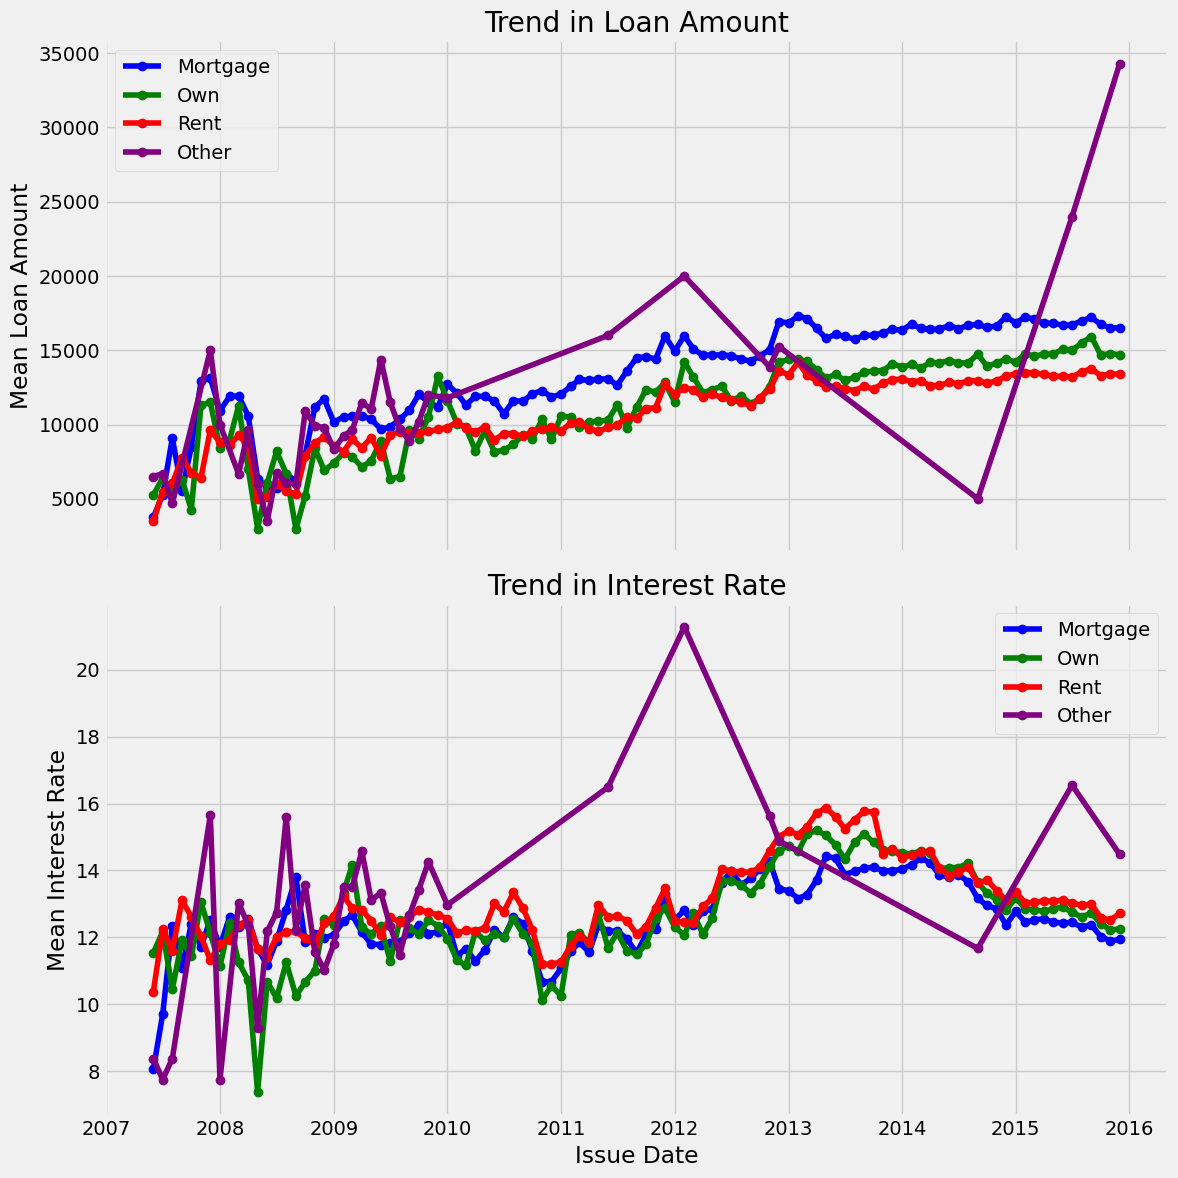

In [30]:
# Group by 'issue_d' and calculate the mean loan amount and interest rate for members with a mortgage
grouped_data = mortgage_data.groupby('issue_d').agg({'loan_amnt': 'mean', 'int_rate': 'mean'}).reset_index()

# Group by 'issue_d' and calculate the mean loan amount and interest rate for members who own
own_grouped_data = own_data.groupby('issue_d').agg({'loan_amnt': 'mean', 'int_rate': 'mean'}).reset_index()

# Group by 'issue_d' and calculate the mean loan amount and interest rate for members who rent
rent_grouped_data = rent_data.groupby('issue_d').agg({'loan_amnt': 'mean', 'int_rate': 'mean'}).reset_index()

# Group by 'issue_d' and calculate the mean loan amount and interest rate for other members
other_grouped_data = other_data.groupby('issue_d').agg({'loan_amnt': 'mean', 'int_rate': 'mean'}).reset_index()

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot mean loan amount for all groups
ax1.plot(grouped_data['issue_d'], grouped_data['loan_amnt'], label='Mortgage', marker='o', color='b')
ax1.plot(own_grouped_data['issue_d'], own_grouped_data['loan_amnt'], label='Own', marker='o', color='g')
ax1.plot(rent_grouped_data['issue_d'], rent_grouped_data['loan_amnt'], label='Rent', marker='o', color='r')
ax1.plot(other_grouped_data['issue_d'], other_grouped_data['loan_amnt'], label='Other', marker='o', color='purple')
ax1.set_title('Trend in Loan Amount')
ax1.set_ylabel('Mean Loan Amount')
ax1.grid(True)
ax1.legend()

# Plot mean interest rate for all groups
ax2.plot(grouped_data['issue_d'], grouped_data['int_rate'], label='Mortgage', marker='o', color='b')
ax2.plot(own_grouped_data['issue_d'], own_grouped_data['int_rate'], label='Own', marker='o', color='g')
ax2.plot(rent_grouped_data['issue_d'], rent_grouped_data['int_rate'], label='Rent', marker='o', color='r')
ax2.plot(other_grouped_data['issue_d'], other_grouped_data['int_rate'], label='Other', marker='o', color='purple')
ax2.set_title('Trend in Interest Rate')
ax2.set_xlabel('Issue Date')
ax2.set_ylabel('Mean Interest Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd

# Assuming your DataFrame is named 'data'
# Convert 'installment' and 'int_rate' to numeric type
data['installment'] = pd.to_numeric(data['installment'], errors='coerce')
data['int_rate'] = pd.to_numeric(data['int_rate'].astype(str).str.rstrip('%'), errors='coerce')

# Drop rows with NaN values in 'installment' and 'int_rate'
data = data.dropna(subset=['installment', 'int_rate'])

# Calculate the 25th percentile of 'installment'
percentile_25 = data['installment'].quantile(0.75)

# Filter members in the top 25% for highest installments
top_25_installments = data[data['installment'] >= percentile_25]

# Sort by 'int_rate' in descending order and select the top 10
top_10_high_interest_rates = top_25_installments.sort_values(by='int_rate', ascending=False).head(10)

# Display the result
print(top_10_high_interest_rates[['member_id', 'int_rate']])

        member_id  int_rate
629657   62514983     28.99
662496   59653094     28.99
526496   68630492     28.99
639365   61754206     28.99
720761   55466052     28.99
607490   64213443     28.99
634952   62119824     28.99
588266   65467599     28.99
695073   58024383     28.99
666409   59651759     28.99


In [15]:
# Filter members who are on other